<a href="https://colab.research.google.com/github/iampramodyadav/FEA/blob/main/FEA_1D_Element.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><div align="center">
  Finite Element Analysis (1-D Elements)
</div><h1>


<div align="center">
  Pramod Kumar Yadav
  @iampramodyadav
</div>



---
![Imgur](https://i.imgur.com/nTr2w2q.jpg "FEA integration Flow Chart")

# Natural Coordinate: Shape Funtion and its derivative

Pramod Kumar Yadav (@iampramodyadav)




---



- This programme calculates the values of Shape functions and their derivatives.
- plot the Shape funtions




## Function for Shape function
- [Nptel Reference](https://nptel.ac.in/content/storage2/courses/112104116/lecture-11/11_10.htm)
- [SymPy Documentation](https://docs.sympy.org/latest/tutorial/basic_operations.html)

- **Shape Functions in Natural Coordinate**
  - ![](https://i.imgur.com/1iBlgQQ.png)
  -Here,Approximation of Order p, 
  - physical coordinate ($x$) and natural coordinate $\xi$ (here, z)

In [1]:
from sympy import *
import numpy as np

In [2]:
z=Symbol('z')

In [3]:
def Shape(p):
  '''
  =====================================================
  Shape(p)
  p:  order (p) of approximation
  z:  value of natural coordinate
  This function return Shape funtions values at given p
  =====================================================
  '''
  z=Symbol('z')
  n=[]

  for i in range(0, p+1):
    point=-1
    point=point+2*i/p
    n.append(point)

  shape=[1]*(p+1)

  for i in range(0,p+1):
    for j in range(0,p+1):
      if i!=j:
        shape[i]=shape[i]*((z-n[j])/(n[i]-n[j]))

  return shape

In [4]:
print(Shape.__doc__)


  Shape(p)
  p:  order (p) of approximation
  z:  value of natural coordinate
  This function return Shape funtions values at given p
  




---



## Function for derivative of Shape function
- [SymPy Documentation](https://docs.sympy.org/latest/tutorial/calculus.html)
- [Reference](https://stackoverflow.com/questions/47998930/differentiation-of-a-list-of-functions-with-respect-to-a-list-of-variables)



In [5]:
def dShape(p):
  '''
  =====================================================
  dShape(p)
  p:  order (p) of approximation

  z:  natural coordinate variable
  This function return derivative of Shape funtions values at given p
  =====================================================
  '''  
  z=Symbol('z')
  f=Shape(p)
  z=symbols('z')
  return [simplify(diff(f1)) for f1 in f]

In [6]:
print(dShape.__doc__)


  dShape(p)
  p:  order (p) of approximation

  z:  natural coordinate variable
  This function return derivative of Shape funtions values at given p
  




---



### Examples

In [7]:
df=dShape(3)
print('Derivative of Shape function:\n',df)

Derivative of Shape function:
 [-1.6875*z**2 + 1.125*z + 0.0625000000000001, 5.0625*z**2 - 1.125*z - 1.6875, -5.0625*z**2 - 1.125*z + 1.6875, 1.6875*z**2 + 1.125*z - 0.0624999999999999]


In [8]:
f=Shape(3)
print('Shape funtion:\n',f ,'\n')

print('Simplified Shape funtion:\n',[simplify(f1) for f1 in f])

Shape funtion:
 [(0.25 - 0.75*z)*(0.5 - 0.5*z)*(-1.5*z - 0.5), (0.5 - 1.5*z)*(0.75 - 0.75*z)*(1.5*z + 1.5), (1.5 - 1.5*z)*(0.75*z + 0.75)*(1.5*z + 0.5), (0.5*z + 0.5)*(0.75*z + 0.25)*(1.5*z - 0.5)] 

Simplified Shape funtion:
 [-0.5625*z**3 + 0.5625*z**2 + 0.0625*z - 0.0625, 1.125*(z - 1)*(z + 1)*(1.5*z - 0.5), -1.125*(z - 1)*(z + 1)*(1.5*z + 0.5), 0.5*(0.75*z + 0.25)*(z + 1)*(1.5*z - 0.5)]


In [9]:
simplify(f[0]) #first term

-0.5625*z**3 + 0.5625*z**2 + 0.0625*z - 0.0625

In [10]:
df[0] #deruvative of first term

-1.6875*z**2 + 1.125*z + 0.0625000000000001



---



## Visualization: Plotting Shape functions

In [11]:
import seaborn as sns

In [12]:
def plotShape(p):
  '''
  =====================================================
  plotShape(p)

  p: order (p) of approximation
  z:value of natural coordinate
  This function return plot of Shape funtions (Natural Coordinate)
  =====================================================
  '''
  sns.set()
  sns.set_style("whitegrid", {'grid.linestyle': '--'})

  z=Symbol('z')
  f=Shape(p)
  p1=plot(0,(z,-1,1),show=False)
  for i in f:
    p2=plot(i,(z,-1,1),show=False)
    p1.append(p2[0])

  return p1.show()

In [13]:
print(plotShape.__doc__)


  plotShape(p)

  p: order (p) of approximation
  z:value of natural coordinate
  This function return plot of Shape funtions (Natural Coordinate)
  


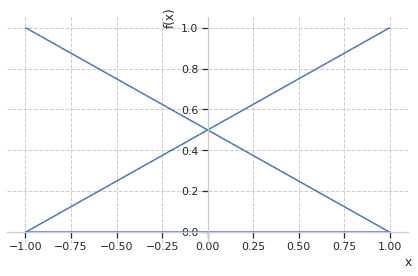

In [14]:
plotShape(1)

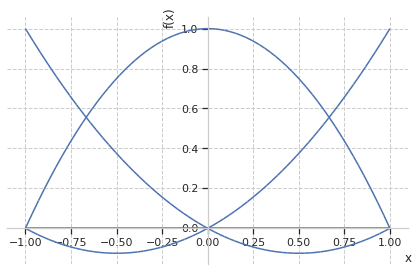

In [15]:
plotShape(2)

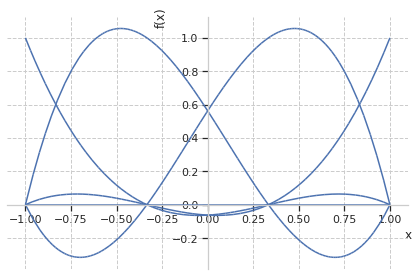

In [16]:
plotShape(3)

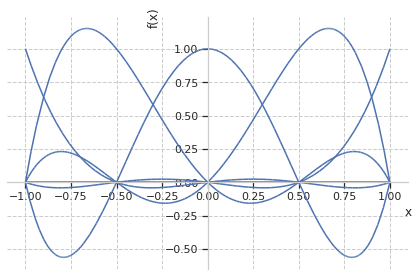

In [17]:
plotShape(4)

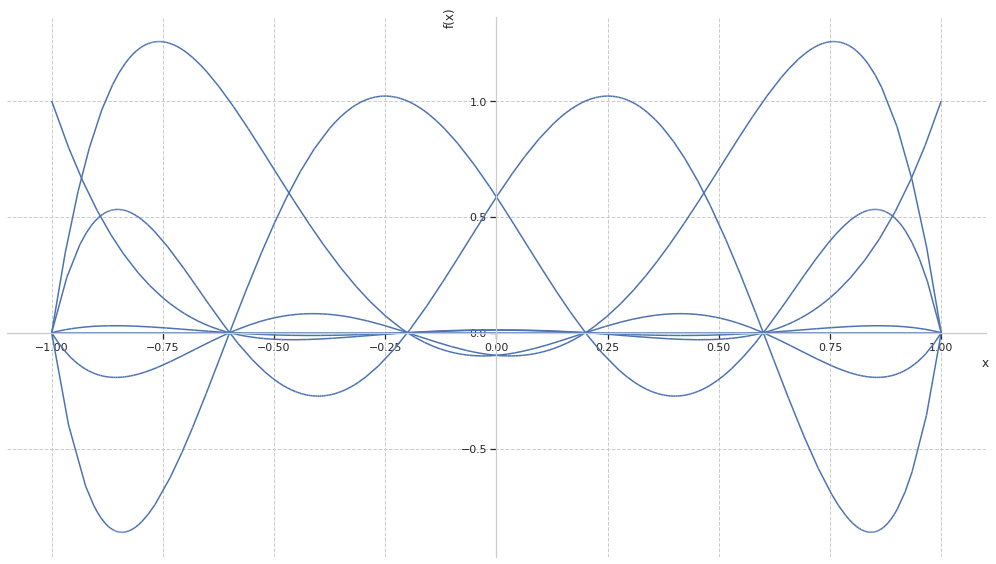

In [18]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 14, 8

plotShape(5)



---



# Gauss-Legendre Quadrature implementation in Python
Pramod Kumar Yadav (@iampramodyadav)



---



<h2><div align="center">
  Important Link and Formula Used
</div><h2>


* [Gaussian quadrature](https://en.wikipedia.org/wiki/Gaussian_quadrature)

* [Legendre polynomials](https://en.wikipedia.org/wiki/Legendre_polynomials#Recurrence_relations)

* [Newton–Raphson method](https://en.wikipedia.org/wiki/Newton%27s_method)


* **Gaussian quadrature Rule**

$${\displaystyle \int _{-1}^{1}f(x)\,dx\approx \sum _{i=1}^{n}w_{i}f(x_{i})}$$

* **Bonnet’s recursion formula for Legendre Polynomial**

    * $$\boxed{\displaystyle (n+1)P_{n+1}(x)=(2n+1)xP_{n}(x)-nP_{n-1}(x)}$$

    * $${\displaystyle P_{0}(x)=1\,}$$

    * $${\displaystyle\quad P_{1}(x)=x}$$

* Recursive equation for derivative of Legendre Polynomial:
  * $$\boxed{\displaystyle {\frac {x^{2}-1}{n}}{\frac {d}{dx}}P_{n}(x)=xP_{n}(x)-P_{n-1}(x)\,}$$

* The $i-th$ Gauss node, $x_i$, is the $i-th$ root of $P_n$ and the weights are given by the formula (Abramowitz & Stegun 1972)

$$\boxed{\displaystyle w_{i}={\frac {2}{\left(1-x_{i}^{2}\right)\left[P'_{n}(x_{i})\right]^{2}}}.}$$
* Newton–Raphson method

$${\displaystyle x_{1}=x_{0}-{\frac {f(x_{0})}{f'(x_{0})}}}$$

* The first guess ${\displaystyle x_{0}}$ for the ${\displaystyle i}$-th root of a ${\displaystyle n}$-order polynomial ${\displaystyle P_{n}}$ can be given by


$${\displaystyle x_{0}=\cos \left({\frac {\pi (i-1/4)}{n+1/2}}\right)}$$



## Legendre Polynomial (symbolic)

[SymPy Documentation](https://docs.sympy.org/latest/tutorial/basic_operations.html)

**Bonnet’s recursion formula for Legendre Polynomial**

  *  $$\boxed{\displaystyle (n+1)P_{n+1}(x)=(2n+1)xP_{n}(x)-nP_{n-1}(x)}$$
    
  * $${\displaystyle P_{0}(x)=1\,}$$

  * $${\displaystyle\quad P_{1}(x)=x}$$




In [19]:
from sympy import *
import numpy as np

In [20]:
x=symbols('x')

In [21]:
def Legendre(n):
  """
  =====================================================
  n: Order of polynomial
  x: Variable
  This function print Legendre polynomial of order n (Symbolic)
  =====================================================
  """

  x=symbols('x')
  if (n==0):
    return x*0+1.0
  elif (n==1):
    return x
  else:
    return ((2.0*n-1.0)*x*Legendre(n-1)-(n-1)*Legendre(n-2))/n

In [22]:
print(Legendre.__doc__)


  n: Order of polynomial
  x: Variable
  This function print Legendre polynomial of order n (Symbolic)
  


**Example:**

In [23]:
Legendre(2)

1.5*x**2 - 0.5

In [24]:
Legendre(5)

-1.33333333333333*x*(1.5*x**2 - 0.5) + 1.8*x*(-1.125*x**2 + 1.75*x*(1.66666666666667*x*(1.5*x**2 - 0.5) - 2*x/3) + 0.375) + 8*x/15

In [25]:
simplify(Legendre(5))

x*(7.875*x**4 - 8.75*x**2 + 1.875)

## Derivative of the Legendre polynomials
[Reference](https://en.wikipedia.org/wiki/Legendre_polynomials#Recurrence_relations)

$$\boxed{\displaystyle {\frac {x^{2}-1}{n}}{\frac {d}{dx}}P_{n}(x)=xP_{n}(x)-P_{n-1}(x)\,}$$

In [26]:
def dLegendre(n):
  """
  =====================================================
  n: Order of polynomial
  x: Variable
  This function print Derivative of Legendre polynomial of order n  (Symbolic)
  =====================================================
  """
  x=symbols('x')
  if (n==0):
    return x*0
  elif (n==1):
    return x*0+1.0
  else:
    return (n/(x**2-1.0))*(x*Legendre(n)-Legendre(n-1))

In [27]:
print(dLegendre.__doc__)


  n: Order of polynomial
  x: Variable
  This function print Derivative of Legendre polynomial of order n  (Symbolic)
  


**Example:**

In [28]:
simplify(dLegendre(2))

3.0*x

In [29]:
dLegendre(5)

5*(1.125*x**2 - 1.75*x*(1.66666666666667*x*(1.5*x**2 - 0.5) - 2*x/3) + x*(-1.33333333333333*x*(1.5*x**2 - 0.5) + 1.8*x*(-1.125*x**2 + 1.75*x*(1.66666666666667*x*(1.5*x**2 - 0.5) - 2*x/3) + 0.375) + 8*x/15) - 0.375)/(x**2 - 1.0)

In [30]:
simplify(dLegendre(5))

0.333333333333333*(118.125*x**6 - 196.875*x**4 + 84.375*x**2 - 5.625)/(x**2 - 1)

### Visualization: Plot Legendre Polynomial

In [31]:
f=Legendre(3)

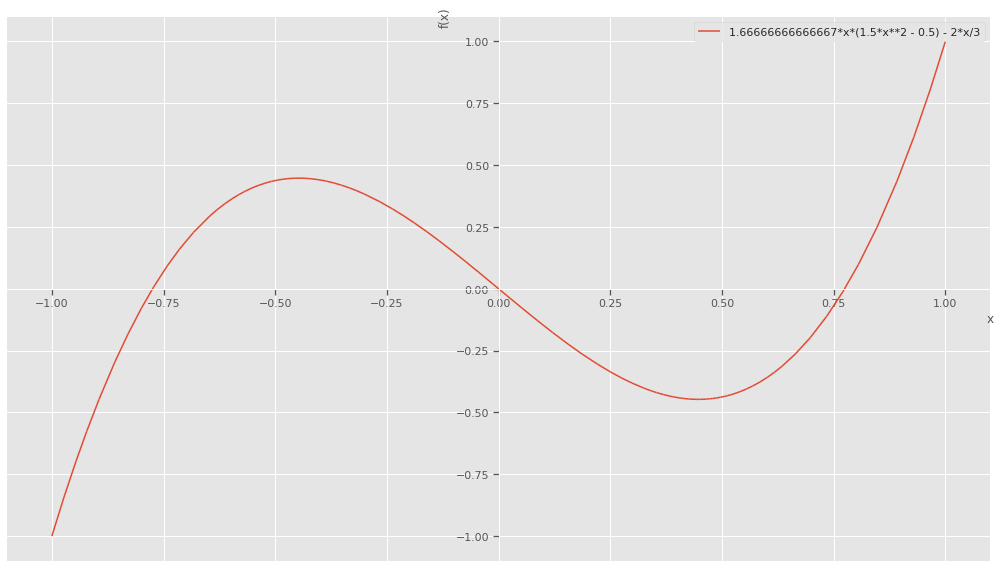

In [32]:
from matplotlib import style
import matplotlib.pyplot as plt

#plt.rcParams['figure.figsize'] = 14, 8
style.use('ggplot')
plot(f,(x,-1,1),legend=True)

In [33]:
f1=Legendre(1)
f2=simplify(Legendre(3))

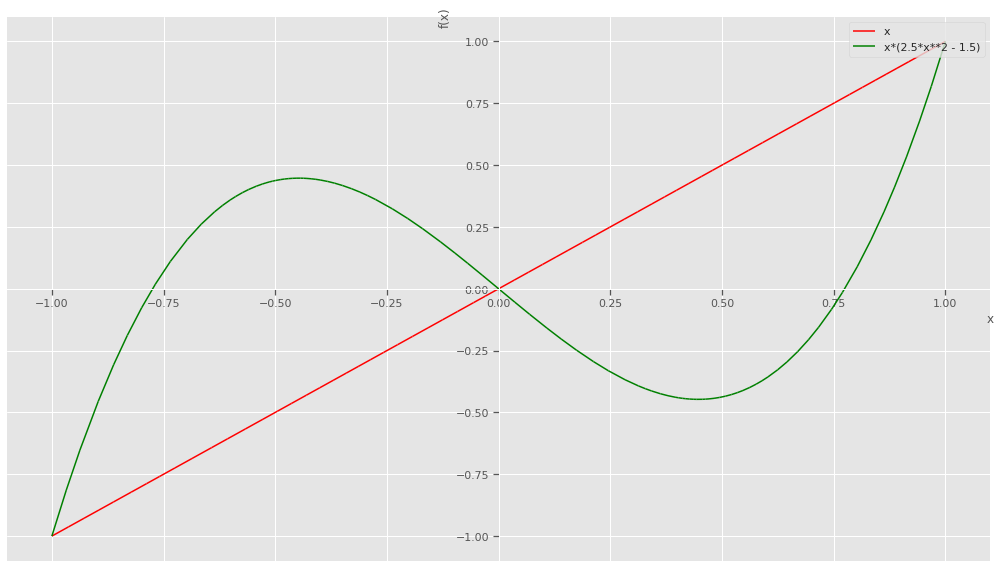

In [34]:
pl=plot(f1,f2,(x,-1,1),legend=True,show=False)
pl[0].line_color = 'red'
pl[1].line_color = 'green'
pl.show()

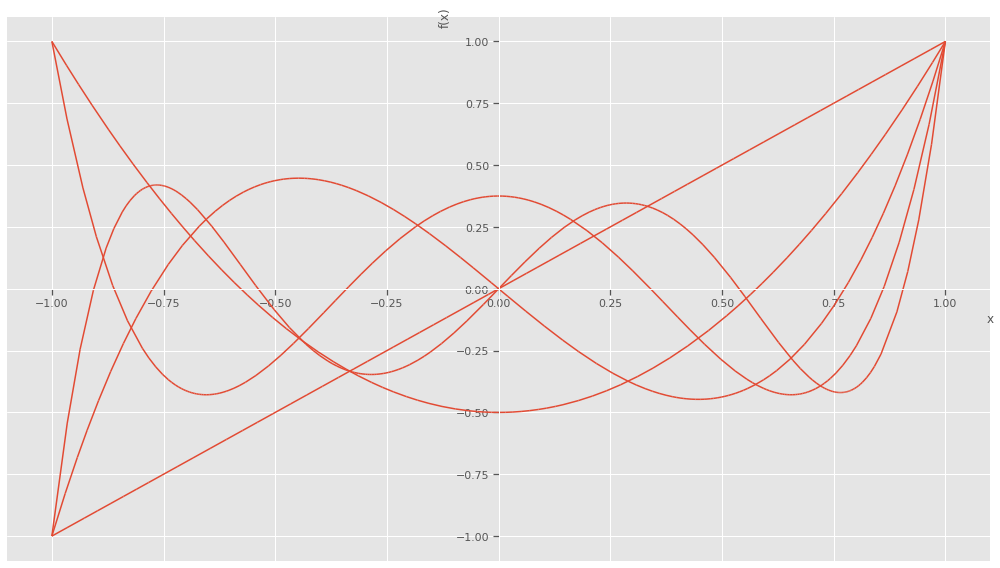

In [35]:
plot(Legendre(1),Legendre(2),Legendre(3),Legendre(4),Legendre(5),(x,-1,1))

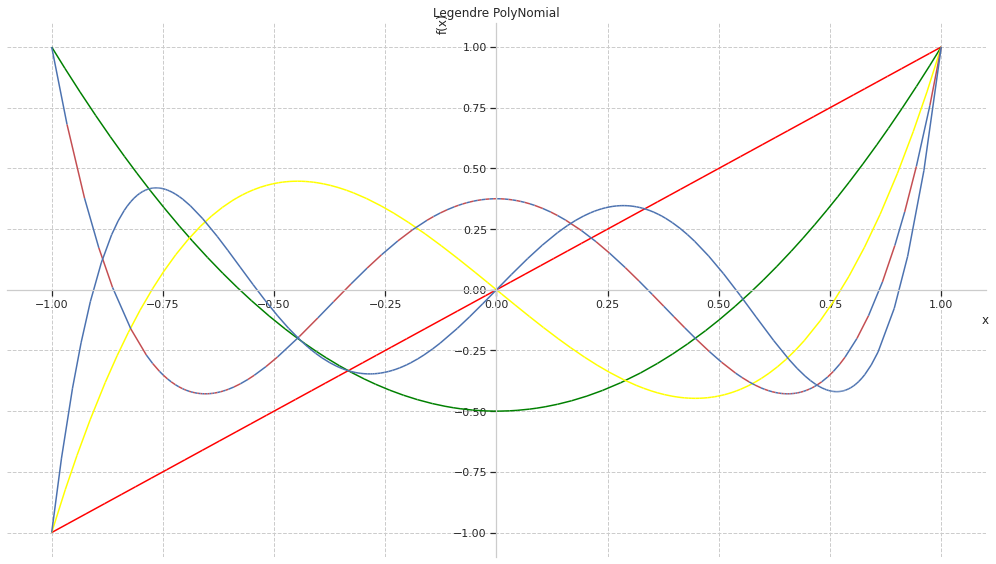

In [36]:
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = 14, 8
sns.set_style("whitegrid", {'grid.linestyle': '--'})
p=plot(Legendre(1),Legendre(2),Legendre(3),Legendre(4),Legendre(5),(x,-1,1),title='Legendre PolyNomial',show=False);
p[0].line_color = 'red'
p[1].line_color = 'green'
p[2].line_color = 'yellow'
p[3].line_color = ['b','r']

p.show()

## Legedre Roots

* The first guess ${\displaystyle x_{0}}$ for the ${\displaystyle i}$-th root of a ${\displaystyle n}$-order polynomial ${\displaystyle P_{n}}$ can be given by
$${\displaystyle x_{0}=\cos \left({\frac {\pi (i-1/4)}{n+1/2}}\right)}$$

* Newton–Raphson method

$${\displaystyle x_{1}=x_{0}-{\frac {f(x_{0})}{f'(x_{0})}}}$$

In [37]:
def LegendreRoots(polyorder,tolerance=1e-20):
  """
  =====================================================
  LegendreRoots(polyorder,tolerance=1e-20)

  polyorder: Order of polynomial(>2)
  tolerance: tolerance of error (default: 1e-20)
  Output: [roots, err]
  This function return Roots of Legendre polynomial
  =====================================================
  """
  if polyorder<2:
    err=1
                                                      # bad polyorder no roots can be found
  else:
    roots=[]
		                                                  # The polynomials are alternately even and odd functions. 
                                                      # So we evaluate only half the number of roots. 
    for i in range(1,int((polyorder)/2) +1):
      x1=cos(pi*(i-0.25)/(polyorder+0.5))
      error=10*tolerance
      iters=0

      while (error>tolerance) and (iters<1000):
        dx=-Legendre(polyorder)/dLegendre(polyorder)
        dx=N(dx.subs(x,x1))
        x1=N(x1+dx)
        iters=iters+1
        error=abs(dx)

      #print(roots)
      roots.append(x1)
      #print(roots)
		                                                            # Use symmetry to get the other roots
    roots=np.array(roots)
    if polyorder%2==0:
      roots=np.concatenate( (-1.0*roots, roots[::-1]) )

    else:
      roots=np.concatenate( (-1.0*roots, [0.0], roots[::-1]) )

    err=0
                                                           # successfully determined roots
  return [roots, err]

In [38]:
print(LegendreRoots.__doc__)


  LegendreRoots(polyorder,tolerance=1e-20)

  polyorder: Order of polynomial(>2)
  tolerance: tolerance of error (default: 1e-20)
  Output: [roots, err]
  This function return Roots of Legendre polynomial
  


**Examples**

In [39]:
[Xis, err]=LegendreRoots(4)
print(Xis)

[-0.861136311594053 -0.339981043584856 0.339981043584856 0.861136311594053]


In [40]:
[Xis, err]=LegendreRoots(5)
print(Xis)

[-0.906179845938664 -0.538469310105683 0.0 0.538469310105683
 0.906179845938664]


## Weight Coefficient

* the $i-th$ Gauss node, $x_i$, is the $i-th$ root of $P_n$ and the weights are given by the formula (Abramowitz & Stegun 1972)

$${\displaystyle w_{i}={\frac {2}{\left(1-x_{i}^{2}\right)\left[P'_{n}(x_{i})\right]^{2}}}.}$$

In [41]:
def GaussLegendreWeights(polyorder):
  """
  =====================================================
  GaussLegendreWeights(polyorder)

  polyorder: Order of polynomial
  Output: [W, xis, err]
  This function return Weights(W) and Roots(xis) of Legendre polynomial
  =====================================================
  """
  W=[]
  [xis,err]=LegendreRoots(polyorder)
  xis=list(xis)
  if err==0:
    for x1 in xis:
      w=2.0/( (1.0-x**2)*(dLegendre(polyorder)**2) )
      w=w.subs(x,x1)
      W.append(w)
      err=0
  else:
    err=1 # could not determine roots - so no weights
  return [W, xis, err]

In [42]:
print(GaussLegendreWeights.__doc__)


  GaussLegendreWeights(polyorder)

  polyorder: Order of polynomial
  Output: [W, xis, err]
  This function return Weights(W) and Roots(xis) of Legendre polynomial
  


**Example**

In [43]:
[W, xis, err]=GaussLegendreWeights(2)
print(W)

[1.00000000000000, 1.00000000000000]


In [44]:
[W, xis, err]=GaussLegendreWeights(5)
print(W)

[0.236926885056189, 0.478628670499366, 0.568888888888889, 0.478628670499366, 0.236926885056189]


## Function Plot Legendre Polynomial

In [45]:
def PlotLegendre(polyorder):
  """
  =====================================================
  PlotLegendre(polyorder)

  This function plot legendre plynomial
  =====================================================
  """
  sns.set()
  sns.set_style("whitegrid", {'grid.linestyle': '--'})
  plot(Legendre(polyorder),(x,-1,1))


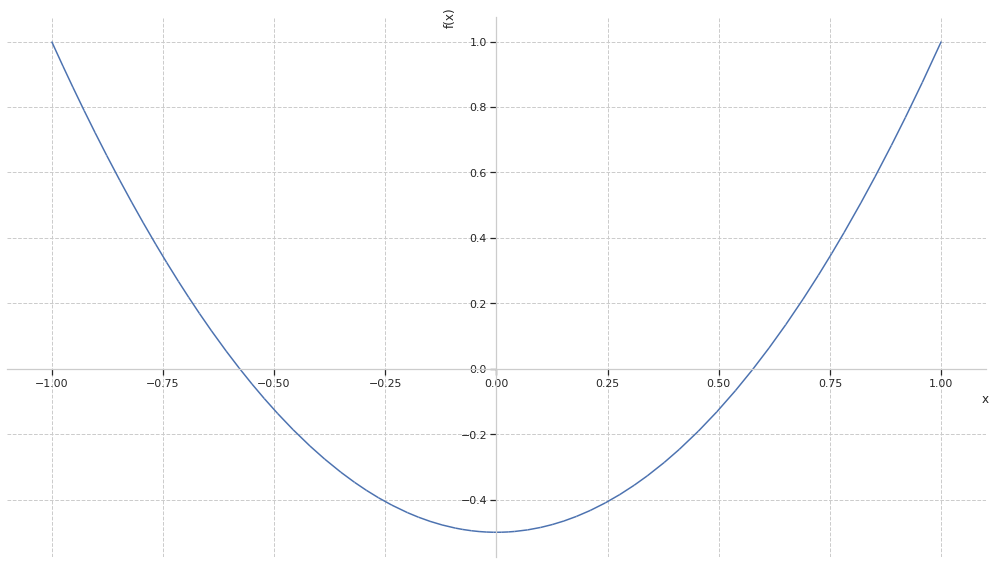

In [46]:
PlotLegendre(2)

## Testing Final Result

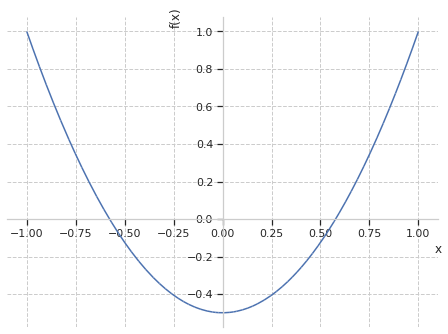

order: 2
Weights: [1.00000000000000, 1.00000000000000]
Roots    :  [-0.577350269189626, 0.577350269189626]





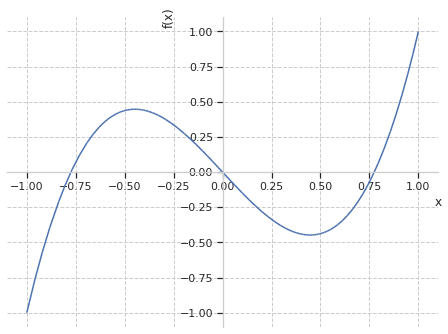

order: 3
Weights: [0.555555555555556, 0.888888888888889, 0.555555555555556]
Roots    :  [-0.774596669241483, 0.0, 0.774596669241483]





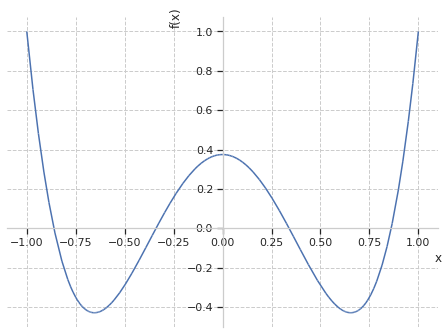

order: 4
Weights: [0.347854845137454, 0.652145154862546, 0.652145154862546, 0.347854845137454]
Roots    :  [-0.861136311594053, -0.339981043584856, 0.339981043584856, 0.861136311594053]





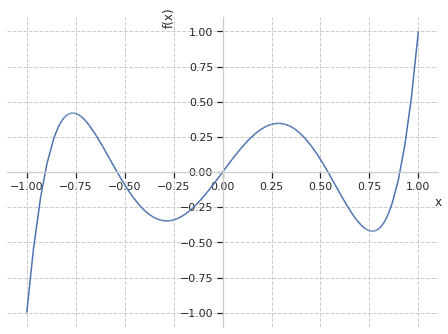

order: 5
Weights: [0.236926885056189, 0.478628670499366, 0.568888888888889, 0.478628670499366, 0.236926885056189]
Roots    :  [-0.906179845938664, -0.538469310105683, 0.0, 0.538469310105683, 0.906179845938664]





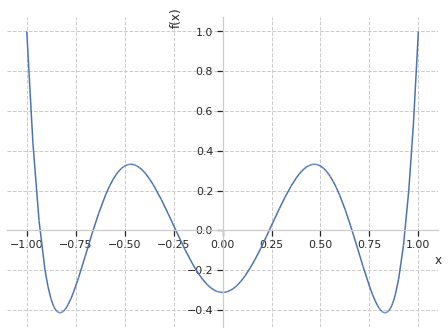

order: 6
Weights: [0.171324492379171, 0.360761573048138, 0.467913934572691, 0.467913934572691, 0.360761573048138, 0.171324492379171]
Roots    :  [-0.932469514203152, -0.661209386466265, -0.238619186083197, 0.238619186083197, 0.661209386466265, 0.932469514203152]





In [47]:
for Polyorder in range(2,7):
  plt.rcParams['figure.figsize'] = 6.4, 4.8
  plot(Legendre(Polyorder),(x,-1,1))

  [W, xis, err]=GaussLegendreWeights(Polyorder)
  print("order:", Polyorder)
  print("Weights:", W)
  print ("Roots    : ",xis)

  print('='*110)
  print('\n\n')
  print('='*110)



---



# Values of Shape Function at Gauss Points (Legendre root)

Pramod Kumar Yadav (iampramodyadav)

Flow chart for Gauss-Legendre Quadrature use in FEA
![Imgur](https://i.imgur.com/nTr2w2q.jpg "FEA integration Flow Chart")



---



In [48]:
def ShapeLegRoot(p):
  """
  =====================================================
  ShapeLegRoot(p)

  p : order of approximation (integer)
  
  Output: [n, W, xis, ShapeValueXi, dShapeValueXi]
  Here,
  n-    Order of gauss legendre polynomial
  W-    Legendre Weights
  xis-  Gauss point coordinates (real)
  ShapeValueXi-   Value of Shape function at  at all the  Xi (real)(Legendre Roots)
  ShapeValueXi-   Value of derivative of Shape function at Gauss points Xi(Legendre Roots) 
  =====================================================
  """

  p=int(p)

  pbar=max(2*p, p+2) 
  if pbar%2!=0:                                   #if odd
    n=(pbar+1)/2
  else:
    n=(pbar+2)/2

  n=int(n)

  #print("Order of gauss legendre polynomial:",n)

  [W, xis, err]=GaussLegendreWeights(n)           #order: Polyorder(n), Weights:  W, Roots: xis

  ShapeValueXi=np.zeros((n, p+1))
  dShapeValueXi=np.zeros((n, p+1))

  #print('ndofel(p+1):',p+1)
  #print('Shape of Shape value matrix:',ShapeValueXi.Shape)

  s=Shape(p)
  ds=dShape(p)

  for i in range(0,n):
    for j in range(0,p+1):

      ShapeValueXi[i][j]=s[j].subs(z,xis[i])          #w.subs(x,x1)
      dShapeValueXi[i][j]=ds[j].subs(z,xis[i])

  return [n, W, xis, ShapeValueXi, dShapeValueXi]

In [49]:
print(ShapeLegRoot.__doc__)


  ShapeLegRoot(p)

  p : order of approximation (integer)
  
  Output: [n, W, xis, ShapeValueXi, dShapeValueXi]
  Here,
  n-    Order of gauss legendre polynomial
  W-    Legendre Weights
  xis-  Gauss point coordinates (real)
  ShapeValueXi-   Value of Shape function at  at all the  Xi (real)(Legendre Roots)
  ShapeValueXi-   Value of derivative of Shape function at Gauss points Xi(Legendre Roots) 
  




---



**Example**

In [50]:
[n, W,xis,ShapeValueXi,dShapeValueXi]=ShapeLegRoot(1)
print('Shape Function values at Legendre roots:\n',ShapeValueXi)
print('Derivative of Shape Function values at Legendre roots\n:',dShapeValueXi)

Shape Function values at Legendre roots:
 [[0.78867513 0.21132487]
 [0.21132487 0.78867513]]
Derivative of Shape Function values at Legendre roots
: [[-0.5  0.5]
 [-0.5  0.5]]


In [51]:
[n, W,xis,ShapeValueXi,dShapeValueXi]=ShapeLegRoot(5)
print('Shape Function values at Legendre roots:\n',ShapeValueXi)
print('Derivative of Shape Function values at Legendre roots\n:',dShapeValueXi)

Shape Function values at Legendre roots:
 [[ 0.66464722  0.6750085  -0.61277567  0.39633694 -0.14644321  0.02322621]
 [ 0.04145294  1.14719867 -0.30450086  0.16307144 -0.05567618  0.008454  ]
 [-0.00517461  0.05451099  1.0201782  -0.08982382  0.02349007 -0.00318084]
 [-0.00318084  0.02349007 -0.08982382  1.0201782   0.05451099 -0.00517461]
 [ 0.008454   -0.05567618  0.16307144 -0.30450086  1.14719867  0.04145294]
 [ 0.02322621 -0.14644321  0.39633694 -0.61277567  0.6750085   0.66464722]]
Derivative of Shape Function values at Legendre roots
: [[-4.2710757   7.68824036 -5.97290352  3.67209091 -1.32305421  0.20670216]
 [-0.87306492 -2.03347341  4.8542633  -2.76385889  0.96414612 -0.14801221]
 [ 0.14181715 -1.57319431 -0.20311928  2.13898231 -0.58491528  0.08042941]
 [-0.08042941  0.58491528 -2.13898231  0.20311928  1.57319431 -0.14181715]
 [ 0.14801221 -0.96414612  2.76385889 -4.8542633   2.03347341  0.87306492]
 [-0.20670216  1.32305421 -3.67209091  5.97290352 -7.68824036  4.2710757 ]]


# Element Calculation

* Here linear mapping function used between the physical coordinate (x) and the natural coordinate $\xi$ (here, z) :

  * ![](https://i.imgur.com/2yMRAeP.png)

  * Hence, $x_1^k$ (xL) and $x_{p+1}^k$ (xR) are the coordinates of the end nodes of the element $k$ and $p$ denotes the order of approximation.

* Expressions for Element Stiffness Matrix and Force Vector
  * $$\boxed{\displaystyle k_{i j}^{k}=\int_{-1}^{1} \hat{E}(\xi) \hat{A}(\xi) \frac{d \hat{N}_{i}(\xi)}{d \xi} \frac{d \hat{N}_{j}(\xi)}{d \xi} \frac{2}{h_{k}} d \xi \quad \text { for } i, j=1,2, \ldots, p+1}$$

  * $$\boxed{\displaystyle f_{i}^{k}=\int_{-1}^{1} \hat{f}(\xi) \hat{N}_{i}(\xi) \frac{h_{k}}{2} d \xi \quad i=1,2, \ldots, p+1}$$

  

## Function for Local $K_{ij}$, & $f_i$ if 1-D Bar Elements

In [52]:
def ElemKfi(k,p,xL,xR,E,a0,a1=0,a2=0,f0=0,f1=0,f2=0):
  """
  =====================================================
  ElemKfi(k,p,xL,xR,E,a0,a1=0,a2=0,f0=0,f1=0,f2=0)

  k :   element number (integer)
  p :   order of approximation (integer)
  xL :  x -coordinate of the left end of the element (real)
  xR :  x -coordinate of the right end of the element (real)
  E :   Young's modules ( E ) of the bar material which is taken as constant (real)
  a0,a1,a2 : coefficients in (A=a0 + a1*x + a2*(x**2)) for the area of cross-section ( A ) of the bar (real)
  f0,f1,f2 : coefficients in (f = f0 + f1*x + f2*x*x) for the distributed force ( f ) acting on the bar (real)

  Output: [Ke, fe]
  Ke : element stiffness matrix (real)
  fe : element force vector (real)
  =====================================================
  """

  Ke=np.zeros((p+1,p+1))  # size of element matrix
  h=xR - xL               # h : element length (real)

  [n, W,xis,ShapeValueXi,dShapeValueXi]=ShapeLegRoot(p)
  fe=np.zeros(p+1)

  for m in range(0,n):
    xi=xis[m]
    x = xL*(1 - z)/2 + xR*(1 + z)/2

    EA = E*(a0 + a1*x+a2*(x**2))
    EA = EA.subs(z,xi)

    f = f0 + f1*x + f2*x*x
    f=f.subs(z,xi)

    for i in range(0, p+1):
      fe[i] = fe[i] + f*ShapeValueXi[m][i]*(h/2)*W[m]

      for j in range(0,p+1):
        Ke[i][j] = Ke[i][j]+EA*dShapeValueXi[m][i]*dShapeValueXi[m][j]*(2/h)*W[m]

  return [Ke, fe]

In [53]:
print(ElemKfi.__doc__)


  ElemKfi(k,p,xL,xR,E,a0,a1=0,a2=0,f0=0,f1=0,f2=0)

  k :   element number (integer)
  p :   order of approximation (integer)
  xL :  x -coordinate of the left end of the element (real)
  xR :  x -coordinate of the right end of the element (real)
  E :   Young's modules ( E ) of the bar material which is taken as constant (real)
  a0,a1,a2 : coefficients in (A=a0 + a1*x + a2*(x**2)) for the area of cross-section ( A ) of the bar (real)
  f0,f1,f2 : coefficients in (f = f0 + f1*x + f2*x*x) for the distributed force ( f ) acting on the bar (real)

  Output: [Ke, fe]
  Ke : element stiffness matrix (real)
  fe : element force vector (real)
  




---



### Example:1
![Imgur](https://i.imgur.com/sYD9Uwt.png)



In [54]:
[ke,fe]=ElemKfi(k=1,p=1,xL=0,xR=10,a0=6,a1=-0.1,a2=0,E=30,f0=0.1296,f1=-0.00216)
print("Local Stiffness Matrix: \n\n", ke,"\n\n")
print("Lobal Force Vector (due to distributed force):\n\n ", fe)

Local Stiffness Matrix: 

 [[ 16.5 -16.5]
 [-16.5  16.5]] 


Lobal Force Vector (due to distributed force):

  [0.612 0.576]


In [55]:
[ke,fe]=ElemKfi(k=1,p=1,xL=10,xR=20,a0=6,a1=-0.1,E=30,f0=0.1296,f1=-0.00216)
print("Local Stiffness Matrix: \n\n", ke,"\n\n")
print("Lobal Force Vector (due to distributed force):\n\n ", fe)

Local Stiffness Matrix: 

 [[ 13.5 -13.5]
 [-13.5  13.5]] 


Lobal Force Vector (due to distributed force):

  [0.504 0.468]


In [56]:
[ke,fe]=ElemKfi(k=1,p=1,xL=20,xR=30,a0=6,a1=-0.1,E=30,f0=0.1296,f1=-0.00216)
print("Local Stiffness Matrix: \n\n", ke,"\n\n")
print("Lobal Force Vector (due to distributed force):\n\n ", fe)

Local Stiffness Matrix: 

 [[ 10.5 -10.5]
 [-10.5  10.5]] 


Lobal Force Vector (due to distributed force):

  [0.396 0.36 ]


### Example:2
- book:
Fundamentals of Finite Element Analysis
Linear Finite Element Analysis-Ioannis Koutromanos
- example-33.2
- page-87/729
![Imgur](https://i.imgur.com/JlgVqxT.png)

**Stiffeness and Force**

In [57]:
[ke,fe]=ElemKfi(k=1,p=1,xL=0,xR=5,E=5000,a0=1,a1=0,a2=1/400,f0=2) #for element-1
print("Local Stiffness Matrix: \n\n", ke,"\n\n")
print("Lobal Force Vector (due to distributed force):\n\n ", fe)

Local Stiffness Matrix: 

 [[ 1020.83333333 -1020.83333333]
 [-1020.83333333  1020.83333333]] 


Lobal Force Vector (due to distributed force):

  [5. 5.]


In [58]:
[ke,fe]=ElemKfi(k=1,p=1,xL=5,xR=20,E=5000,a0=1,a1=0,a2=1/400,f0=2) #for element-2
print("Local Stiffness Matrix: \n\n", ke,"\n\n")
print("Lobal Force Vector (due to distributed force):\n\n ", fe)

Local Stiffness Matrix: 

 [[ 479.16666667 -479.16666667]
 [-479.16666667  479.16666667]] 


Lobal Force Vector (due to distributed force):

  [15. 15.]


##  Function for Global $K_{ij}$, & $f_i$ if 1-D Bar Devided in Equal Size of Elements 

In [59]:
def GlobalKfi(k,p,xL,xR,E,a0,a1=0,a2=0,f0=0,f1=0,f2=0):

  """
  =====================================================
    Note: For elements of equal length

    GlobalKfi(k,p,xL,xR,E,a0,a1=0,a2=0,f0=0,f1=0,f2=0)

    k :   number of elements (integer)
    p :   order of approximation (integer)
    xL :  x -coordinate of the left end of the element (real)
    xR :  x -coordinate of the right end of the element (real)
    E :   Young's modules ( E ) of the bar material which is taken as constant (real)
    a0,a1,a2 : coefficients in (A=a0 + a1*x + a2*(x**2)) for the area of cross-section ( A ) of the bar (real)
    f0,f1,f2 : coefficients in (f = f0 + f1*x + f2*x*x) for the distributed force ( f ) acting on the bar (real)

    Output: [Kg, fg]
    Kg : Global stiffness matrix (real)
    fg : Global force vector (real)
  =====================================================
  """

  Kg=np.zeros(((k+1)*p,(k+1)*p))  #size of element matrix
  h=xR - xL

  [n, W,xis,ShapeValueXi,dShapeValueXi]=ShapeLegRoot(p)
  fg=np.zeros((k+1)*p)

  for e in range(0,k*p,p):
    #xL=N[e]
    #xR=N[e+1]
    for m in range(0,n):
      xi=xis[m]
      x = (xL+h*e)*(1 - z)/2 + (xR+h*e)*(1 + z)/2

      EA = E*(a0 + a1*x+a2*(x**2))
      EA = EA.subs(z,xi)

      f = f0 + f1*x + f2*x*x
      f=f.subs(z,xi)

      for i in range(0, p+1):
        fg[i+e] = fg[i+e] + f*ShapeValueXi[m][i]*(h/2)*W[m]

        for j in range(0,p+1):
          Kg[i+e][j+e] = Kg[i+e][j+e]+EA*dShapeValueXi[m][i]*dShapeValueXi[m][j]*(2/h)*W[m]

  return [Kg, fg]

In [60]:
print(GlobalKfi.__doc__)


    Note: For elements of equal length

    GlobalKfi(k,p,xL,xR,E,a0,a1=0,a2=0,f0=0,f1=0,f2=0)

    k :   number of elements (integer)
    p :   order of approximation (integer)
    xL :  x -coordinate of the left end of the element (real)
    xR :  x -coordinate of the right end of the element (real)
    E :   Young's modules ( E ) of the bar material which is taken as constant (real)
    a0,a1,a2 : coefficients in (A=a0 + a1*x + a2*(x**2)) for the area of cross-section ( A ) of the bar (real)
    f0,f1,f2 : coefficients in (f = f0 + f1*x + f2*x*x) for the distributed force ( f ) acting on the bar (real)

    Output: [Kg, fg]
    Kg : Global stiffness matrix (real)
    fg : Global force vector (real)
  


### **Example:1**
![Imgur](https://i.imgur.com/sYD9Uwt.png)

**Solution:**
Local Stiffeness Matrices (alreday evaluated above)

Global Stiffeness Matrix
1. Equal Elements Length (Methode-1)

In [61]:
[Kij, fi]=GlobalKfi(k=3,p=1,xL=0,xR=10,a0=6,a1=-0.1,a2=0,E=30,f0=0.1296,f1=-0.00216)
print("Global Stiffness Matrix: \n\n", Kij,"\n\n")
print("Global Force Vector (due to distributed force):\n\n ", fi)

Global Stiffness Matrix: 

 [[ 16.5 -16.5   0.    0. ]
 [-16.5  30.  -13.5   0. ]
 [  0.  -13.5  24.  -10.5]
 [  0.    0.  -10.5  10.5]] 


Global Force Vector (due to distributed force):

  [0.612 1.08  0.864 0.36 ]




---



##  Function for Global $K_{ij}$, & $f_i$ if 1-D Bar Devided in Unequal Size of Elements


*   NodesList=Nodes X- Cordinate as list
*   k=Number of element
*   here,K+1=length(NodesList)



In [62]:
def GlobalKfiU(k,p,E,NodesList,a0,a1=0,a2=0,f0=0,f1=0,f2=0):

  """
  =====================================================
    Note: For elements of unequal (or equal) length

    GlobalKfiU(k,p,E,NodesList,a0,a1=0,a2=0,f0=0,f1=0,f2=0)

    k :   number of elements (integer)
    p :   order of approximation (integer)
    NodesList:  [x0,x1,x2....xk] (X coordinates of nodes)
    E :   Young's modules ( E ) of the bar material which is taken as constant (real)
    a0,a1,a2 : coefficients in (A=a0 + a1*x + a2*(x**2)) for the area of cross-section ( A ) of the bar (real)
    f0,f1,f2 : coefficients in (f = f0 + f1*x + f2*x*x) for the distributed force ( f ) acting on the bar (real)

    Output: [Kg, fg]
    Kg : Globel stiffness matrix (real)
    fg : Globel force vector (real)
  =====================================================
  """

  Kg=np.zeros(((k+1)*p,(k+1)*p))                        #size of element matrix

  [n, W,xis,ShapeValueXi,dShapeValueXi]=ShapeLegRoot(p)
  fg=np.zeros((k+1)*p)

  for e in range(0,k*p,p):
    xL=NodesList[e]
    xR=NodesList[e+1]
    h=xR - xL

    for m in range(0,n):
      xi=xis[m]
      x = (xL)*(1 - z)/2 + (xR)*(1 + z)/2

      EA = E*(a0 + a1*x+a2*(x**2))
      EA = EA.subs(z,xi)

      f = f0 + f1*x + f2*x*x
      f=f.subs(z,xi)

      for i in range(0, p+1):
        fg[i+e] = fg[i+e] + f*ShapeValueXi[m][i]*(h/2)*W[m]

        for j in range(0,p+1):
          Kg[i+e][j+e] = Kg[i+e][j+e]+EA*dShapeValueXi[m][i]*dShapeValueXi[m][j]*(2/h)*W[m]

  return [Kg, fg]

In [63]:
print(GlobalKfiU.__doc__)


    Note: For elements of unequal (or equal) length

    GlobalKfiU(k,p,E,NodesList,a0,a1=0,a2=0,f0=0,f1=0,f2=0)

    k :   number of elements (integer)
    p :   order of approximation (integer)
    NodesList:  [x0,x1,x2....xk] (X coordinates of nodes)
    E :   Young's modules ( E ) of the bar material which is taken as constant (real)
    a0,a1,a2 : coefficients in (A=a0 + a1*x + a2*(x**2)) for the area of cross-section ( A ) of the bar (real)
    f0,f1,f2 : coefficients in (f = f0 + f1*x + f2*x*x) for the distributed force ( f ) acting on the bar (real)

    Output: [Kg, fg]
    Kg : Globel stiffness matrix (real)
    fg : Globel force vector (real)
  


### **Example:2**
*![Imgur](https://i.imgur.com/JlgVqxT.png)*

**Solution**

In [64]:
[Kij,fi]=GlobalKfiU(k=2,p=1,NodesList=[0,5,20],E=5000,a0=1,a1=0,a2=1/400,f0=2)
print("Global Stiffness Matrix: \n\n", Kij,"\n\n")
print("Global Force Vector (due to distributed force):\n\n ", fi)

Global Stiffness Matrix: 

 [[ 1020.83333333 -1020.83333333     0.        ]
 [-1020.83333333  1500.          -479.16666667]
 [    0.          -479.16666667   479.16666667]] 


Global Force Vector (due to distributed force):

  [ 5. 20. 15.]




---



**Example-1 By this methode**(metode-2)

In [65]:
[Kij,fi]=GlobalKfiU(k=3,p=1,NodesList=[0,10,20,30],a0=6,a1=-0.1,a2=0,E=30,f0=0.1296,f1=-0.00216) #global K,f
print("Global Stiffness Matrix: \n\n", Kij,"\n\n")
print("Global Force Vector (due to distributed force):\n\n ", fi)

Global Stiffness Matrix: 

 [[ 16.5 -16.5   0.    0. ]
 [-16.5  30.  -13.5   0. ]
 [  0.  -13.5  24.  -10.5]
 [  0.    0.  -10.5  10.5]] 


Global Force Vector (due to distributed force):

  [0.612 1.08  0.864 0.36 ]




---

